In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [61]:
class KMeans:
    def __init__(self,k):
        self.k = k
    
    def l2(self,p1,p2):
        return np.sum((p1-p2)**2)
    
    def fit(self,data,set_seed=False,set_limit=[1e-4,1e5],**kwargs):
        #select k random points from the dataset
        if set_seed: random.seed(kwargs['seed'])  
        points = random.sample(range(data.shape[0]),self.k)

        #set the initial centroids as the co-ordinates of the random points selected
        centroids = np.array([data.iloc[point] for point in points])
        init_centroids = centroids.copy()
        prev_centroids = np.zeros(centroids.shape)
        
        # repeat the process till the centroids wont change
        while not np.equal(prev_centroids,centroids).all():
            prev_centroids = centroids.copy()

            #get euclidean distances of all points from the centroids
            distances = [[self.l2(data.iloc[i],centroid) for centroid in centroids] for i in range(data.shape[0])] 

            #get the new classes of the points from the new centroids
            new_classes = []
            for i in distances:                        
                new_classes.append(i.index(min(i)))

            centroids = []

            #set a new centroid as the average of distances of all points in each class 
            for i in range(self.k):
                l = [data.iloc[j] for j in range(len(data)) if j!=new_classes[j]==i]
                
                avg = sum(l)/(len(l)-1)
                
                #if the average values are too high or too low, keep the prev centroid value for that class as current centroid
                if np.any(avg<set_limit[0]) or np.any(avg>set_limit[1]): centroids.append(prev_centroids[i])
                else: centroids.append(avg)
            
            
        return centroids,new_classes

In [148]:
data = load_iris()
iris_data = pd.DataFrame(data['data'],columns=[data['feature_names']]) #[['sepal length (cm)','petal length (cm)']]
iris_data['target'] = data['target']
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [149]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

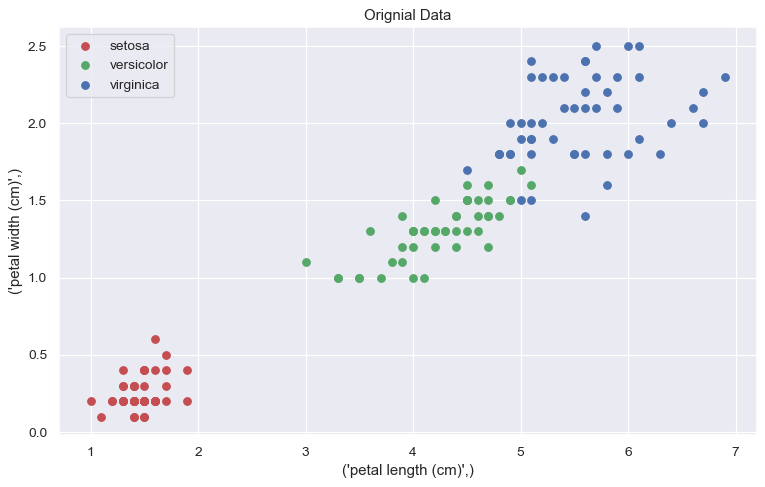

In [150]:
sns.set()
plt.figure(figsize=(10,6),dpi=90)

plt.scatter(iris_data.iloc[:50,2],iris_data.iloc[:50,3],color='r',label='setosa')
plt.scatter(iris_data.iloc[50:100,2],iris_data.iloc[50:100,3],color='g',label='versicolor')
plt.scatter(iris_data.iloc[100:150,2],iris_data.iloc[100:150,3],color='b',label='virginica')
plt.title("Orignial Data")

plt.xlabel(iris_data.columns[2])
plt.ylabel(iris_data.columns[3])
plt.legend()
plt.show()

In [151]:
model = KMeans(3)
centroids,classes = model.fit(iris_data.iloc[:,:-1],keep_seed=True,set_limit=[1e-4,1e5],seed=4)

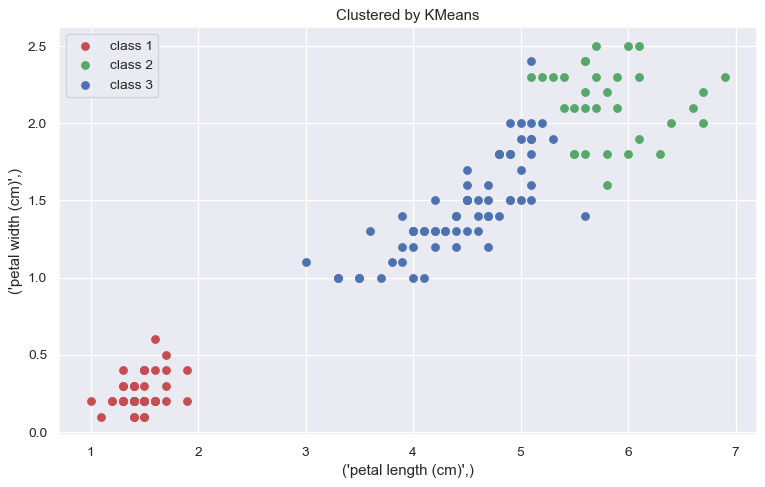

In [152]:
#get classes
iris_data['target'] = classes

class_1 = np.array([[iris_data.iloc[i,2],iris_data.iloc[i,3]] for i in iris_data.index if iris_data.iloc[i,-1]==0])
class_2 = np.array([[iris_data.iloc[i,2],iris_data.iloc[i,3]] for i in iris_data.index if iris_data.iloc[i,-1]==1])
class_3 = np.array([[iris_data.iloc[i,2],iris_data.iloc[i,3]] for i in iris_data.index if iris_data.iloc[i,-1]==2])

#plot
plt.figure(figsize=(10,6),dpi=90)

plt.scatter(class_1[:,0],class_1[:,1],color='r',label='class 1')
plt.scatter(class_2[:,0],class_2[:,1],color='g',label='class 2')
plt.scatter(class_3[:,0],class_3[:,1],color='b',label='class 3')
plt.title("Clustered by KMeans")

plt.xlabel(iris_data.columns[2])
plt.ylabel(iris_data.columns[3])
plt.legend()
plt.show()